# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on = "Mouse ID")

# Display the data table for preview
combined_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [2]:
# Checking the number of mice.
mouseID = combined_df['Mouse ID'].nunique()
mouseID

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False),:]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"] !="g989"]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouseID2 = clean_df['Mouse ID'].nunique()
mouseID2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary1_df = pd.DataFrame({
    
    'Mean Tumor Volume': clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
})
summary1_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_regimen_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_df = summary_regimen_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'meadian': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})
summary_df

,Mean Tumor Volume,median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

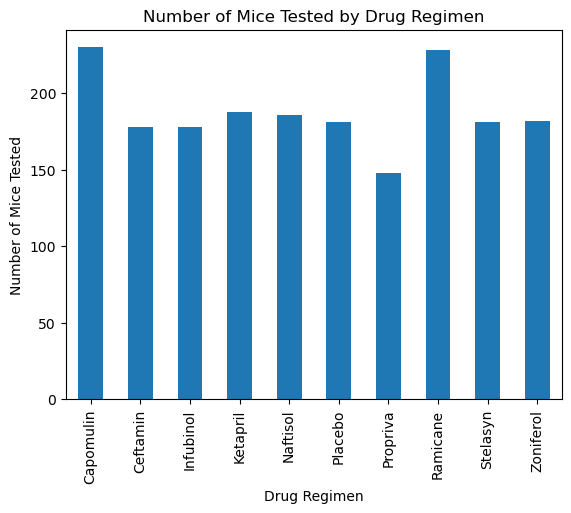

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
mice_tested_plot = mice_tested.plot(kind='bar', xlabel = 'Drug Regimen', ylabel = 'Number of Mice Tested', title = 'Number of Mice Tested by Drug Regimen')

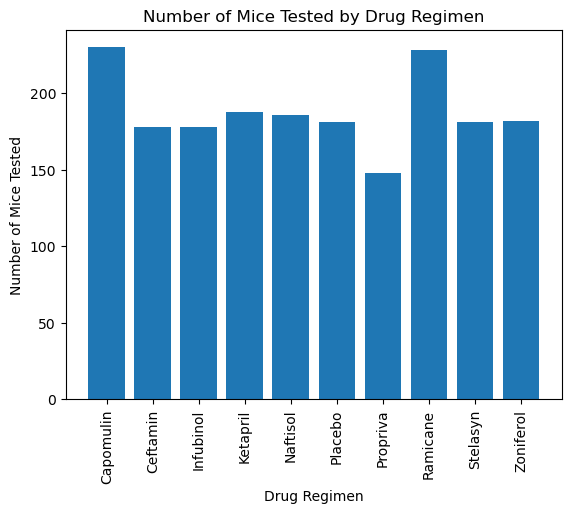

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_tested.index.values
y_axis = mice_tested.values

plt.bar(x_axis, y_axis, align = 'center')
plt.title("Number of Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

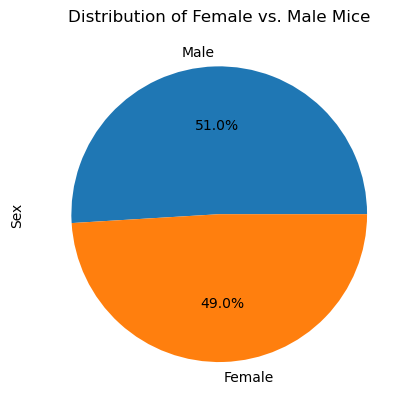

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df['Sex'].value_counts()
mice_sex.plot.pie(autopct="%1.1f%%", title='Distribution of Female vs. Male Mice')
plt.show()

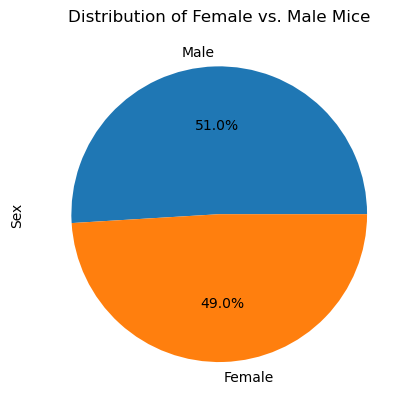

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = clean_df['Sex'].value_counts()
sex = ['Male','Female']
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.pie(mice_sex, labels = sex, autopct = "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint_great = clean_df.groupby('Mouse ID')['Timepoint'].max()
timepoint_great_df = pd.DataFrame(timepoint_great)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge = pd.merge(timepoint_great_df,combined_df,on=('Mouse ID','Timepoint'),how='left')

final_tumor_vol = timepoint_merge.loc[(timepoint_merge['Drug Regimen'] == 'Capomulin') | (timepoint_merge['Drug Regimen'] == 'Ramicane') | (timepoint_merge['Drug Regimen'] == 'Infubinol') | (timepoint_merge['Drug Regimen'] == 'Ceftamin'),:]
final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for treatment in treatments:

    treatment_data = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(treatment_data)
    
    quartiles = treatment_data.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = [x for x in treatment_data if x < lower_bound or x > upper_bound]
    
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


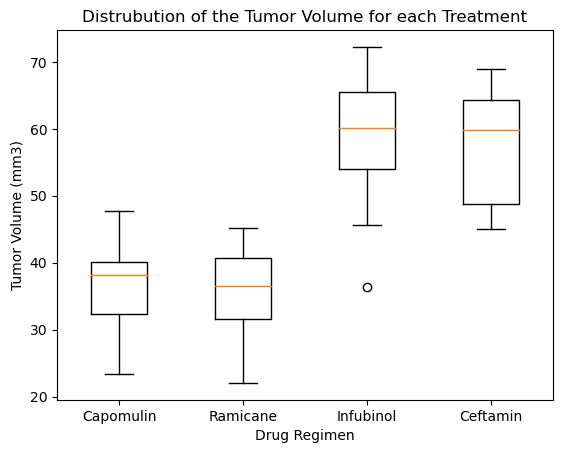

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distrubution of the Tumor Volume for each Treatment')
plt.show()

## Line and Scatter Plots

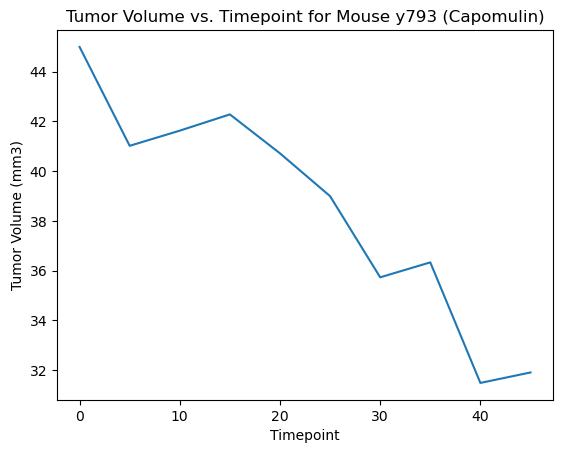

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_data["Mouse ID"].sample().iloc[0]

mouse_data = clean_df[clean_df["Mouse ID"] == mouse_id]

import matplotlib.pyplot as plt
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.show()

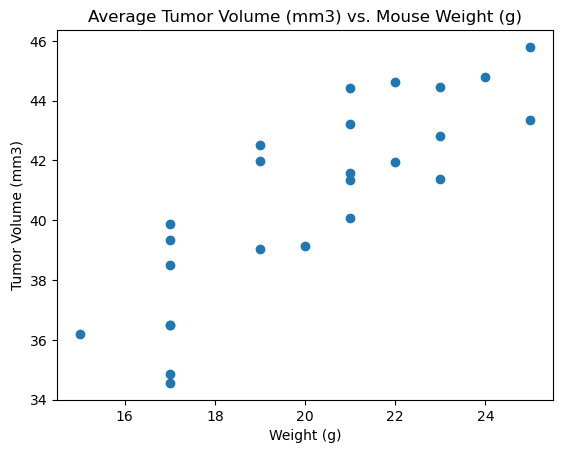

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

avg_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(avg_weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.show()

## Correlation and Regression

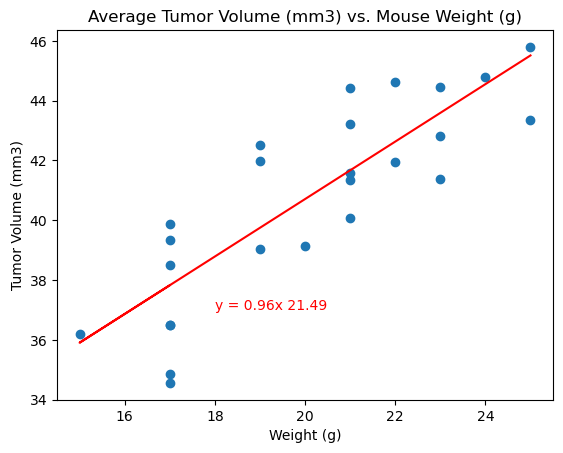

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderrr) = st.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
regress_values = slope * capomulin_data['Weight (g)'] + intercept

regress_x = capomulin_data['Weight (g)']

plt.scatter(avg_weight, avg_tumor)
plt.plot(regress_x, regress_values, color = 'red')
plt.annotate(f"y = {round(slope, 2)}x {round(intercept, 2)}", (18, 37), color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.show()

